In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Game%20of%20Thrones/character-predictions.csv")

In [2]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

data.loc[:, "culture"] = [get_cult(x) for x in data.culture.fillna("")]


data.drop(["name", "alive", "pred", "plod", "isAlive", "dateOfBirth", "DateoFdeath"], 1, inplace = True)

data.loc[:, "title"] = pd.factorize(data.title)[0]
data.loc[:, "culture"] = pd.factorize(data.culture)[0]
data.loc[:, "mother"] = pd.factorize(data.mother)[0]
data.loc[:, "father"] = pd.factorize(data.father)[0]
data.loc[:, "heir"] = pd.factorize(data.heir)[0]
data.loc[:, "house"] = pd.factorize(data.house)[0]
data.loc[:, "spouse"] = pd.factorize(data.spouse)[0]

data.fillna(value = -1, inplace = True)
''' $$ The code below usually works as a sample equilibrium. However in this case,
 this equilibirium actually decrease our accuracy, all because the original 
prediction data was released without any sample balancing. $$

data = data[data.actual == 0].sample(350, random_state = 62).append(data[data.actual == 1].sample(350, random_state = 62)).copy(deep = True).astype(np.float64)

'''
Y = data.actual.values

Odata = data.copy(deep=True)

data.drop(["actual"], 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


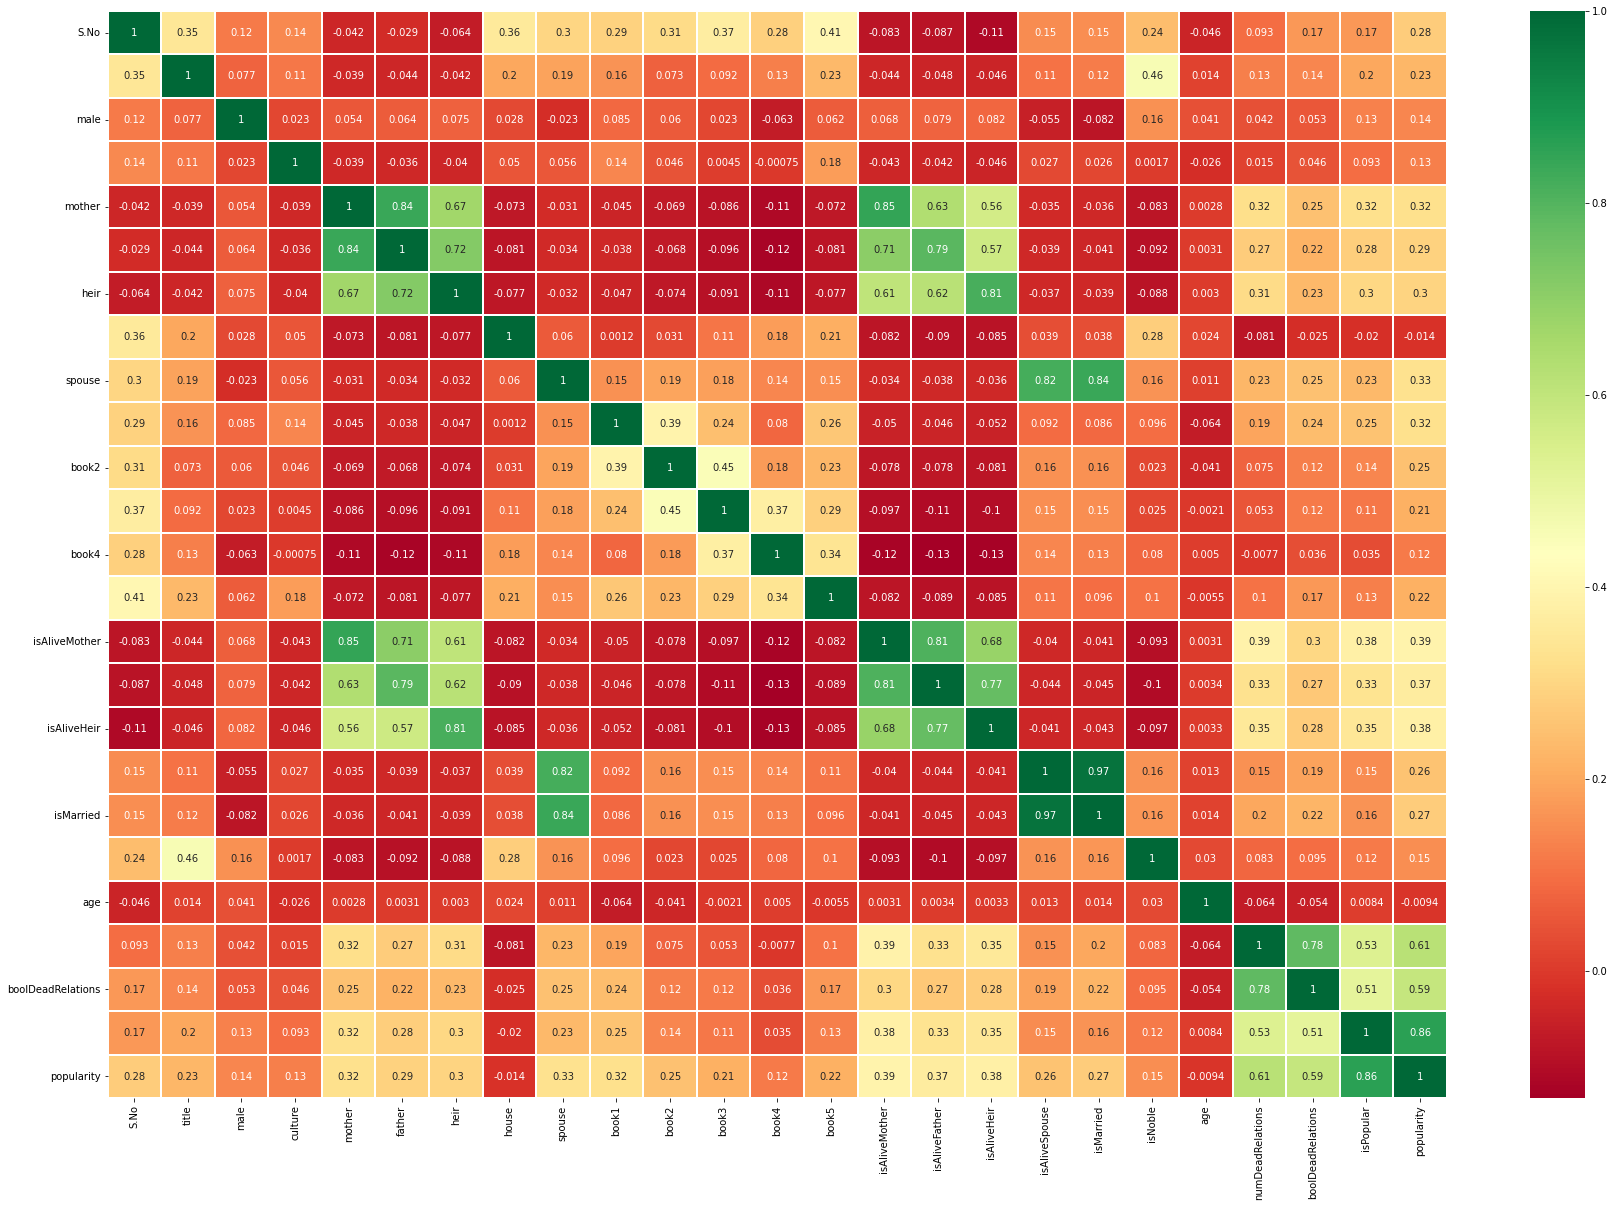

In [3]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,20)
plt.show()

In [4]:
data.drop(["S.No"], 1, inplace = True)
''' ATTENTION: This rf algorithm achieves 99%+ accuracy, this is because the \
original predictor-- the document releaser use exactly the same algorithm to predict!
    '''
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(data, Y)

print('RandomForest Accuracy：(original)\n',random_forest.score(data, Y))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


RandomForest Accuracy：(original)
 0.9922918807810894


In [5]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()

DT.fit(data,Y)

print('DecisionTree Accuracy：(original)\n',DT.score(data, Y))

DecisionTree Accuracy：(original)
 0.9922918807810894


In [6]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()

svc.fit(data, Y)

print('SVC Accuracy：\n',svc.score(data, Y))

SVC Accuracy：
 0.7466598150051388


In [7]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(data, Y)

print('LogisticRegression Accuracy：\n',LR.score(data, Y))

LogisticRegression Accuracy：
 0.7533401849948612


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(data, Y)

print('kNN Accuracy：\n',knn.score(data, Y))

kNN Accuracy：
 0.8525179856115108


In [9]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(data, Y)

print('gaussian Accuracy：\n',gaussian.score(data, Y))

gaussian Accuracy：
 0.7702980472764646
